In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Load the dataset (replace 'your_data.csv' with the actual file path)
df = pd.read_csv('Thyroid_Diff.csv')
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,No
...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,Yes


In [39]:
# Display the first few rows of the dataframe
print("Initial data preview:")
print(df.head())

Initial data preview:
   Age Gender Smoking Hx Smoking Hx Radiothreapy Thyroid Function  \
0   27      F      No         No              No        Euthyroid   
1   34      F      No        Yes              No        Euthyroid   
2   30      F      No         No              No        Euthyroid   
3   62      F      No         No              No        Euthyroid   
4   62      F      No         No              No        Euthyroid   

          Physical Examination Adenopathy       Pathology     Focality  \
0   Single nodular goiter-left         No  Micropapillary    Uni-Focal   
1          Multinodular goiter         No  Micropapillary    Uni-Focal   
2  Single nodular goiter-right         No  Micropapillary    Uni-Focal   
3  Single nodular goiter-right         No  Micropapillary    Uni-Focal   
4          Multinodular goiter         No  Micropapillary  Multi-Focal   

  Recurred  
0       No  
1       No  
2       No  
3       No  
4       No  


In [41]:
# Data preprocessing
label_encoder = LabelEncoder()

# Encoding categorical variables
categorical_cols = ['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 
                    'Physical Examination', 'Adenopathy', 'Pathology', 'Focality']

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [42]:
# Splitting the dataset into features and target variable
X = df.drop(columns=['Recurred'])  # Features
y = df['Recurred']  # Target variable

In [43]:
# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Training the model using Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [45]:
# Making predictions
y_pred = model.predict(X_test)


In [46]:
# Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

          No       0.86      0.95      0.90        58
         Yes       0.77      0.53      0.62        19

    accuracy                           0.84        77
   macro avg       0.81      0.74      0.76        77
weighted avg       0.84      0.84      0.83        77



In [47]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)


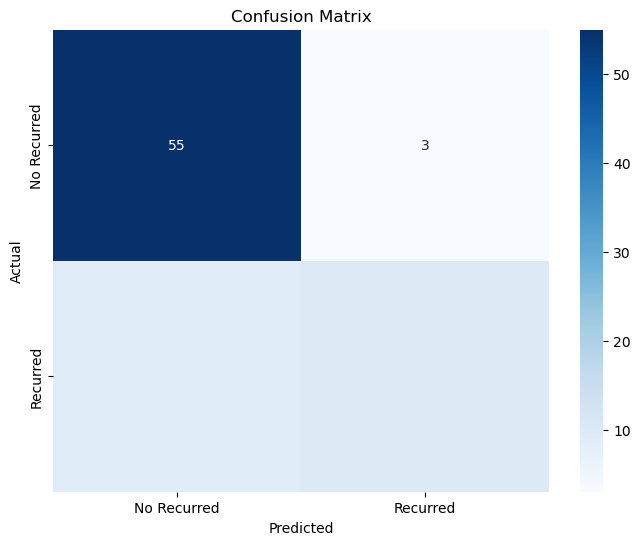

In [48]:
# Visualization 1: Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Recurred', 'Recurred'], yticklabels=['No Recurred', 'Recurred'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

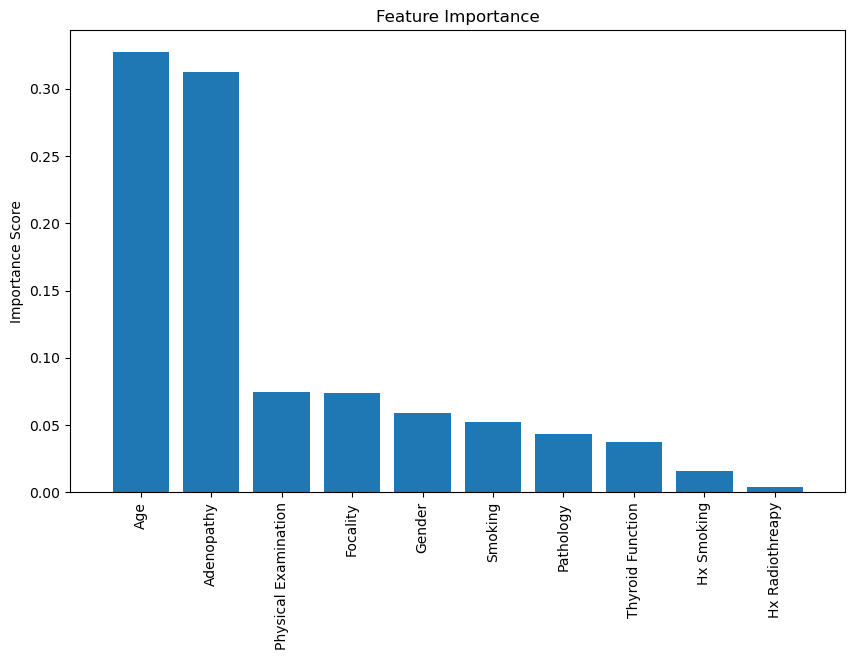

In [49]:
# Visualization 2: Feature Importance
importance = model.feature_importances_
features = X.columns
indices = np.argsort(importance)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importance[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.ylabel('Importance Score')
plt.show()

E:\anacondafold\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\anacondafold\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\anacondafold\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\anacondafold\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('

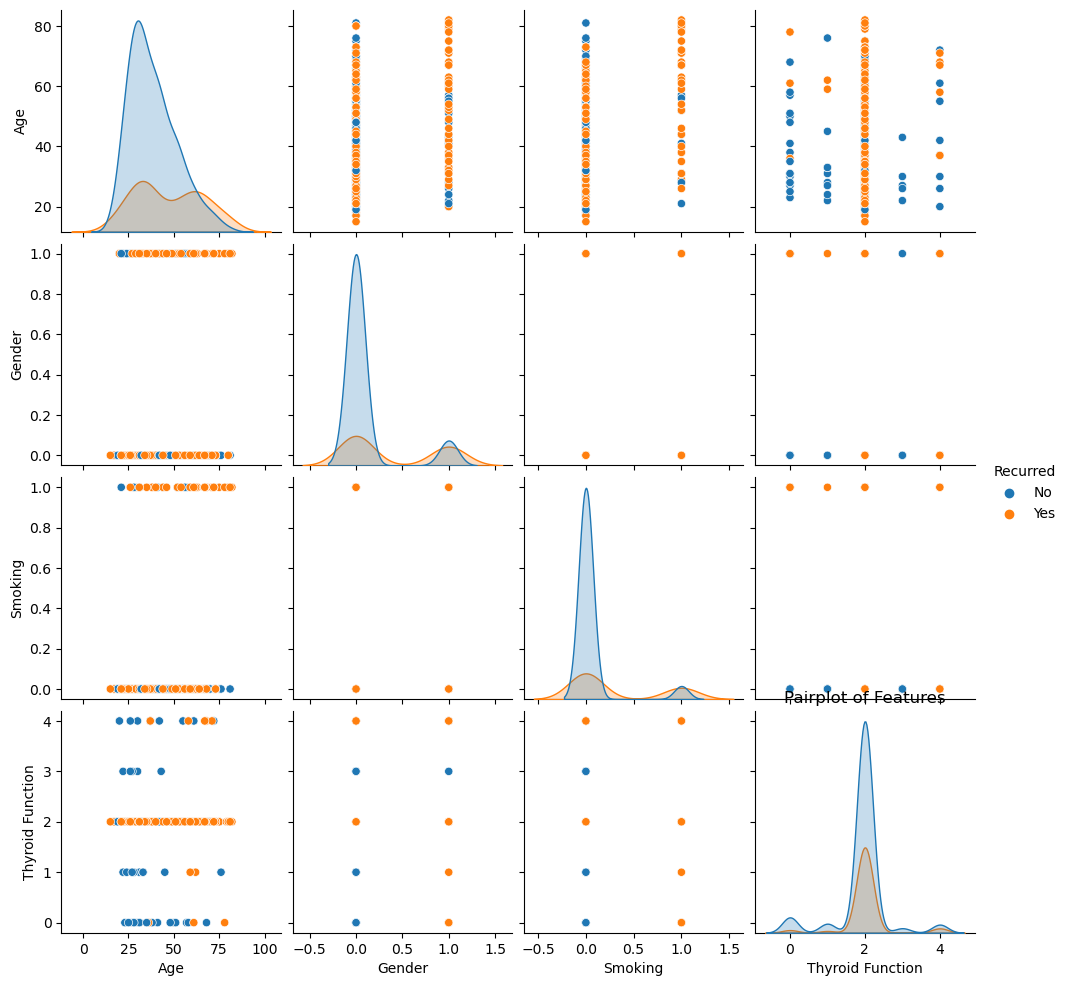

In [50]:
# Visualization 3: Pairplot of Relevant Features
sns.pairplot(df, hue='Recurred', vars=['Age', 'Gender', 'Smoking', 'Thyroid Function'])
plt.title("Pairplot of Features")
plt.show()

E:\anacondafold\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


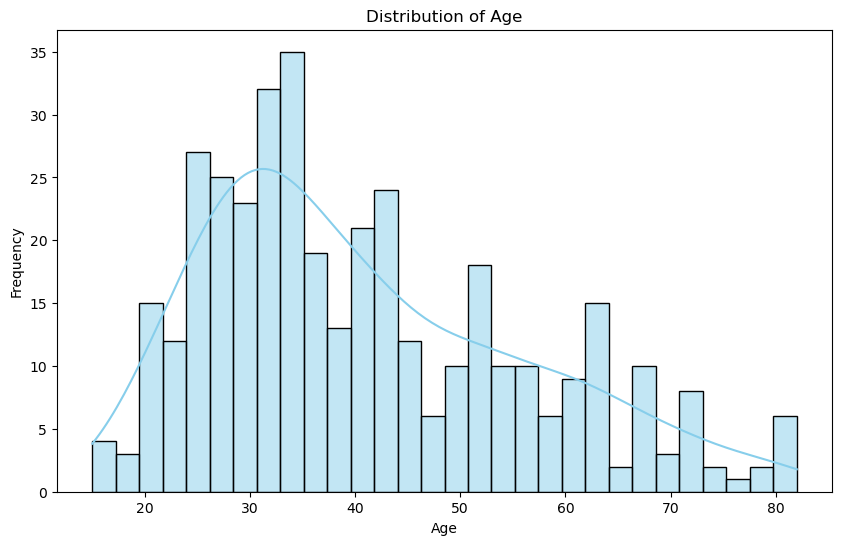

In [51]:
# Visualization 4: Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

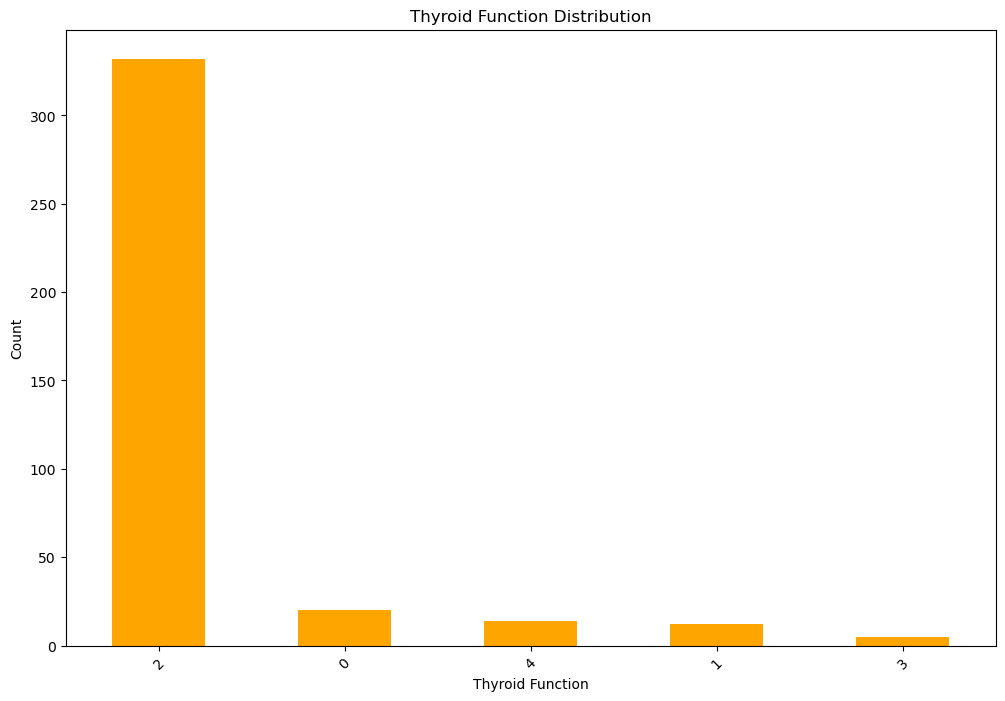

In [52]:
# Visualization 5: Bar Plot for Categorical Variables
plt.figure(figsize=(12, 8))
df['Thyroid Function'].value_counts().plot(kind='bar', color='orange')
plt.title("Thyroid Function Distribution")
plt.xlabel("Thyroid Function")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()